# 2.6 比较、掩码和布尔逻辑



In [1]:
import numpy as np
import pandas as pd

# use pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
inches.shape

(365,)

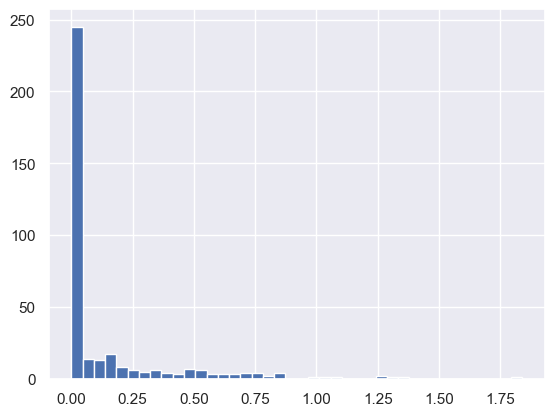

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

seaborn.set()  # set plot styles

plt.hist(inches, 40);

## 和通用函数类似的比较操作

```
np.eqaual        ==
np.not_equal     !=
np.less
np.less_equal
np.greater
np.greater_equal


```



In [3]:
x = np.array([1, 2, 3, 4, 5])

print(x < 3)
print(x >= 3)

[ True  True False False False]
[False False  True  True  True]


In [4]:
# 利用复合表达式

print((2 * x) == (x ** 2))

[False  True False False False]


In [5]:
# x < 3 等价于 np.less(x, 3)

print(np.less(x, 3))

[ True  True False False False]


## 操作布尔数组

1. 统计记录的个数，使用 np.count_nonzero
2. 快速检查任意或者所有这些值是否为True, 可以使用 np.any np.all
3. 布尔运算符

统计降水量小于4 而且 大于 2 的天数？？？ 通过python的逐位逻辑运算符 bitwise logic operator

```
&            np.bitwise_and
|            np.bitwise_or
^            np.bitwise_xor
~            np.bitwise_not

```


In [6]:
rng = np.random.RandomState(0)

x = rng.randint(10, size=(3, 4))
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


In [7]:
np.count_nonzero(x < 6)

8

In [8]:
# 另一种实现方式是利用 np.sum, 在这个例子中 False会被解释成0， True会被解释成1
np.sum(x < 6)

8

In [9]:
# 可以沿着列进行
np.sum(x < 6, axis=1)

array([4, 2, 2])

In [10]:
print(np.any(x > 8))
print(np.any(x < 0))

print(np.all(x < 10))

print(np.all(x < 8, axis=1))

True
False
True
[ True False  True]


In [12]:
# 统计降水量小于4 而且 大于 2 的天数？？？
print(np.sum((inches > 0.5) & (inches < 1)))

print(np.sum(~((inches <= 0.5) | (inches >= 1))))

29
29


In [13]:
print("Number days without rain:      ", np.sum(inches == 0))
print("Number days with rain:         ", np.sum(inches != 0))
print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
print("Rainy days with < 0.2 inches  :", np.sum((inches > 0) & (inches < 0.2)))

Number days without rain:       215
Number days with rain:          150
Days with more than 0.5 inches: 37
Rainy days with < 0.2 inches  : 75


## 将布尔数组作为掩码

一种更强大的模式是使用布尔数组作为掩码，通过该掩码选择数据的子数据集。

利用比较运算符可以得到一个布尔数组

使用 and/or 还是 逻辑操作运算符 &/|

and/or判断整个对象是真或者假，&/|是指每个对象中的比特位，当在numpy中有一个布尔数组时，该数组可以被当作是由比特字符组成的。


In [14]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


In [15]:
# 掩码操作
x[x < 5]

array([0, 3, 3, 3, 2, 4])

In [16]:
# 为所有下雨天创建一个掩码
rainy = (inches > 0)

# construct a mask of all summer days (June 21st is the 172nd day)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Median precip on rainy days in 2014 (inches):   ", np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):  ", np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ", np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):", np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches):    0.19488188976377951
Median precip on summer days in 2014 (inches):   0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315
